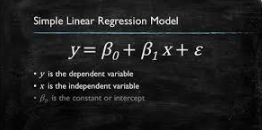

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/MBASalary.csv')

In [3]:
df.head()

,Percentage Marks,Salary
0,62.00,270000
1,76.33,200000
2,72.00,240000
3,60.00,250000
4,61.00,180000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Percentage Marks  50 non-null     float64
 1   Salary            50 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 928.0 bytes


In [5]:
df.describe()

,Percentage Marks,Salary
count,50.000000,50.000000
mean,63.922400,258192.000000
std,9.859937,76715.790993
min,37.330000,120000.000000
25%,57.685000,204500.000000
50%,64.700000,250000.000000
75%,70.000000,300000.000000
max,83.000000,450000.000000


In [6]:
df.corr()

,Percentage Marks,Salary
Percentage Marks,1.000000,0.395367
Salary,0.395367,1.000000


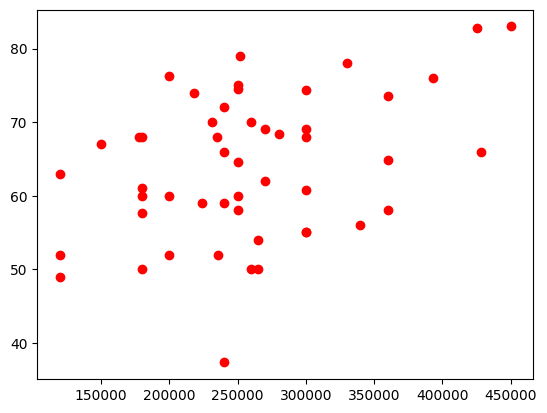

In [8]:
plt.scatter(df.Salary,df["Percentage Marks"],color='red')



In [9]:
df.columns

Index(['Percentage Marks', 'Salary'], dtype='object')

In [10]:
X=df[['Percentage Marks']]
y=df['Salary']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2529)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
ss= StandardScaler()

In [15]:
X_train=ss.fit_transform(X_train)

In [16]:
pd.DataFrame(X_train).describe()

,0
count,3.700000e+01
mean,-4.230850e-16
std,1.013794e+00
min,-2.455292e+00
25%,-8.068577e-01
50%,8.872636e-02
75%,7.790724e-01
max,1.805263e+00


**ss.fit_transform** mean aprox to 0 and standard deviation aprox to 1.

In [17]:
X_test=ss.transform(X_test)

In [18]:
pd.DataFrame(X_test).describe()

,0
count,13.000000
mean,0.098127
std,0.603184
min,-0.900148
25%,-0.340408
50%,0.107384
75%,0.405912
max,1.183018


**ss.transform** it just save operation , doesn't convert values, #Prevent Data Leakage

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()

In [21]:
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
lr.coef_

array([34981.73538909])

In [23]:
lr.intercept_

262232.4324324324

#Model training is done!

In [24]:
#Predicting the values for training and testing sets

y_train_pred = lr.predict(X_train)

y_test_pred = lr.predict(X_test)

In [25]:
from sklearn.metrics import r2_score

In [26]:
train_accuracy = r2_score(y_train, y_train_pred)

test_accuracy = r2_score(y_test, y_test_pred)

In [27]:
print(f"Train Accuracy: {train_accuracy}")

print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.2216080492884257
Test Accuracy: -0.04778873698521746


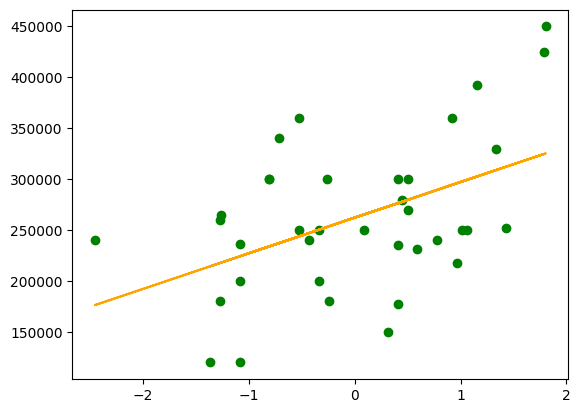

In [28]:
## plot Training data plot best fit line
plt.scatter(X_train,y_train,color='green')
plt.plot(X_train,lr.predict(X_train),color='orange')

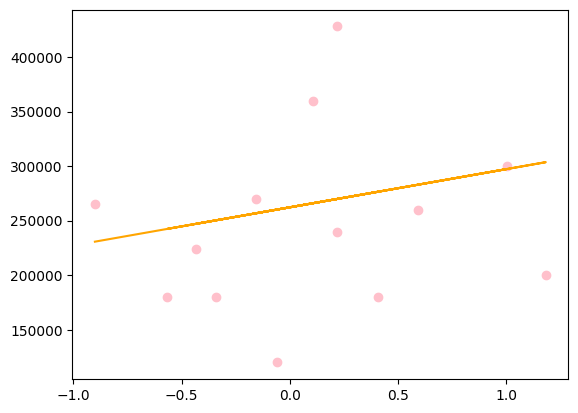

In [29]:
## plot Training data plot best fit line
plt.scatter(X_test,y_test,color='pink')
plt.plot(X_test,lr.predict(X_test),color='orange')

In [30]:
## Performance Metrics for Trian Data
from sklearn.metrics import mean_absolute_error,mean_squared_error

mse=mean_squared_error(y_train,y_train_pred)
mae=mean_absolute_error(y_train,y_train_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

4298287948.115991
54974.00458925779
65561.32967013399


In [31]:
## Performance Metrics for Test Data
from sklearn.metrics import mean_absolute_error,mean_squared_error

mse=mean_squared_error(y_test,y_test_pred)
mae=mean_absolute_error(y_test,y_test_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

6588396379.229368
65464.017400911885
81168.93728039913


# Hence Coclusion : Our Model is in Underfitting?

1.   High Bias
2.   High Variance

